**Import libraries**

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**Dataset load**

In [42]:
print(color.DARKCYAN+color.BOLD+"Creating file database...."+color.END)
df=pd.read_csv('/content/drive/MyDrive/Assignments/IR Assignment 2/Data/IR-assignment-2-data.txt',sep=" ",header=None)
filedatabase={}
for iterator in range(0,len(df.index)):
    check1=df.at[iterator,1]
    if ("qid:4"==check1):
        filedatabase[iterator]=df.at[iterator,0]
print(color.DARKCYAN+color.BOLD+"File database created successfully"+color.END)

Creating file database....
File database created successfully


**Rearrangement of query-url pairs in order of max-DCG**

In [9]:
def queryurlfile(df, filedatabase):
    newdataframe=df.drop((df.index[len(filedatabase):]))
    #newdataframe.to_csv("fileobtained.csv")
    np.savetxt('fileobtained.txt',newdataframe.values,delimiter=" ",fmt='%s')

In [10]:
queryurlfile(df,filedatabase)
tupledocid=filedatabase.items()
tupledocid=list(tupledocid)
filedatabase=sorted(filedatabase.items(),key=lambda pairs:(pairs[1],pairs[0]),reverse=True)

**Generation of total files that can be made**

In [11]:
def countfinal(filedatabase):
    find1=0
    find2=0
    find3=0
    find4=0
    for iterator in filedatabase:
        if (iterator[1]==1):
            find3=find3+1;
        elif (iterator[1]==2):
            find2=find2+1;
        elif (iterator[1]==3):
            find1=find1+1;
        else:
            find4=find4+1;
    a=math.factorial(find1)
    b=math.factorial(find2)
    c=math.factorial(find3)
    d=math.factorial(find4)
    answer=a*b*c*d
    return answer
countfinal(filedatabase)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

In [12]:
def calculate1(files,cal_len):
    output=files[0][1]
    for iterator in range(1,cal_len):
        d=files[iterator][1]
        e=math.log2(iterator+1)
        output=output+(d/e)   
    return output 

**Computing nDCG**
1. At 50
2. For the whole dataset

In [28]:
length_a=len(filedatabase)
length_b=len(tupledocid)
calundcg=calculate1(tupledocid,length_b)
calundcgval=calculate1(tupledocid,51)
caldcgmax=calculate1(filedatabase,length_a)
caldcgval=calculate1(filedatabase,51)
ndcg50=calundcgval/caldcgval
ndcgwhole=calundcg/caldcgmax
print(color.BOLD+"nDCG at 50:"+color.END+color.BLUE+"{0:32}".format(ndcg50),color.END)
print(color.BOLD+"nDCG for whole Dataset: "+color.END+color.BLUE,ndcgwhole,color.END)

nDCG at 50:              0.3521042740324887 
nDCG for whole Dataset:  0.5979226516897831 


**Plotting precision recall curve**

In [29]:
def calculate2(filedatabase):
    for iterator in range(0,len(df.index)):
        check1=df.at[iterator,1]
        if("qid:4"==check1):
            store=float(df.at[iterator,76][3:])
            f=df.at[iterator,0]
            variable=(store,f)
            filedatabase[iterator]=variable


In [30]:
storedval={}

In [37]:
def gpr(pair1):
    xaxis=[]
    cal3=sorted(pair1.items(),key=lambda pairs:(pairs[1],pairs[0]),reverse=True)
    document1=103
    yaxis=[]
    document2=74
    document3=0 
    tfsort=len(cal3)
    for iterator in range(0,tfsort):
        if (cal3[iterator][1][1]!=0):
            document3=document3+1
        p=document3/(iterator+1)
        yaxis.append(p)
        r=document3/document2
        xaxis.append(r)
    plt.plot(xaxis, yaxis,color='blue',linewidth=4)
    plt.title('Precision Recall Curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

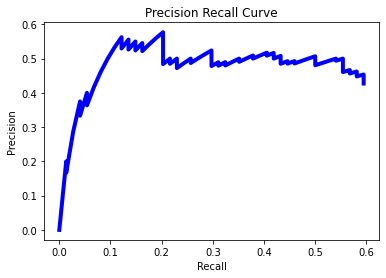

In [38]:
calculate2(storedval)
gpr(storedval)